# Project 2
Mitchell Morrison and Christian Gould

We have decided to use the COVID 19 dataset in pair with a dataset of holidays and their dates around the world. We plan on enriching the COVID dataset by showing the relationship between the period following a holiday and the level of covid in the country celebrating. The COVID dataset was gathered for the purpose of testing it in conjunction with holiday data. 

Dataset links:
1. https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide
2. https://www.kaggle.com/vbmokin/covid19-holidays-of-countries?select=holidays_df_of_70_countries_for_covid_19.csv

# Part 1 - Getting Started
Import libraries
Load original Data (which ever one you chose from the provided list) into a data frame.
Load your additional data set(s) into a data frame.
In a markdown cell, provide a brief description of your the data sets you've chosen to work with.
Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section.

# Part 2 - Data Inspection
Write some code to summarize the datasets. Think about the following questions:

What type of data is each variable? (think like a data scientist here, not a computer scientist)<br>
What is the total size of the data sets?<br>
What time boundaries are there in the dataset? IOW, what time frame do they span?<br>
Are there any missing values in any of the variables?<br>
Do this with Intentionality. Don't skimp.<br>

In [10]:
import numpy as np
import pandas as pd

## Understanding our datasets

### Holidays dataset

In [11]:
holidays = pd.read_csv('datasets/holidays_df_of_70_countries_for_covid_19.csv')
holidays.head()

,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
0,2020-02-24,Día de Carnaval [Carnival's Day],2020-03-02,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays
1,2020-02-25,Día de Carnaval [Carnival's Day],2020-03-03,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays
2,2020-03-24,Día Nacional de la Memoria por la Verdad y la ...,2020-03-31,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays
3,2020-04-09,Semana Santa (Jueves Santo) [Holy day (Holy T...,2020-04-16,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays
4,2020-04-10,Semana Santa (Viernes Santo) [Holy day (Holy ...,2020-04-17,Argentina,AR,Argentine Republic,-3,3,10,https://github.com/dr-prodigy/python-holidays


In [12]:
holidays.columns

Index(['ds_holidays', 'holiday', 'ds', 'country', 'code',
       'country_official_name', 'lower_window', 'upper_window', 'prior_scale',
       'source'],
      dtype='object')

In [13]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ds_holidays            806 non-null    object
 1   holiday                806 non-null    object
 2   ds                     806 non-null    object
 3   country                806 non-null    object
 4   code                   806 non-null    object
 5   country_official_name  806 non-null    object
 6   lower_window           806 non-null    int64 
 7   upper_window           806 non-null    int64 
 8   prior_scale            806 non-null    int64 
 9   source                 806 non-null    object
dtypes: int64(3), object(7)
memory usage: 63.1+ KB


All holidays are in a Date string format and the countries and country codes are all strings. The lower and upper window variables are ints. 

In [14]:
holidays.describe()

,lower_window,upper_window,prior_scale
count,806.0,806.0,806.0
mean,-3.0,3.0,10.0
std,0.0,0.0,0.0
min,-3.0,3.0,10.0
25%,-3.0,3.0,10.0
50%,-3.0,3.0,10.0
75%,-3.0,3.0,10.0
max,-3.0,3.0,10.0


This .describe means nothing to us because all the columns of interest are categorical. We are really only using this table to gather the holidays dates and the corresponding country where the holiday is celebrated.

In [15]:
min(holidays.ds), max(holidays.ds)

('2020-01-28', '2021-01-07')

The holidays dataset ranges in dates from Jan 28th 2020 to Jan 7th 2021.

### COVID 19 dataset

In [16]:
covid = pd.read_csv('datasets/owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [17]:
columnsOfInterest = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'new_cases_smoothed', 'total_deaths', 'new_deaths', 'total_cases_per_million',
        'new_cases_per_million', 'new_cases_smoothed_per_million']
covid[columnsOfInterest]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.126,0.126,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.126,0.000,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.126,0.000,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.126,0.000,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.126,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
153167,ZWE,Africa,Zimbabwe,2022-01-04,217678.0,1591.0,1447.143,5078.0,31.0,14423.240,105.419,95.887
153168,ZWE,Africa,Zimbabwe,2022-01-05,219057.0,1379.0,1644.143,5092.0,14.0,14514.612,91.372,108.940
153169,ZWE,Africa,Zimbabwe,2022-01-06,220178.0,1121.0,1207.143,5108.0,16.0,14588.889,74.277,79.985
153170,ZWE,Africa,Zimbabwe,2022-01-07,221282.0,1104.0,1146.286,5136.0,28.0,14662.039,73.151,75.952


In [18]:
covid = covid[columnsOfInterest]

In [19]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153172 entries, 0 to 153171
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   iso_code                        153172 non-null  object 
 1   continent                       143944 non-null  object 
 2   location                        153172 non-null  object 
 3   date                            153172 non-null  object 
 4   total_cases                     150522 non-null  float64
 5   new_cases                       150431 non-null  float64
 6   new_cases_smoothed              149280 non-null  float64
 7   total_deaths                    133279 non-null  float64
 8   new_deaths                      133441 non-null  float64
 9   total_cases_per_million         149820 non-null  float64
 10  new_cases_per_million           149729 non-null  float64
 11  new_cases_smoothed_per_million  148583 non-null  float64
dtypes: float64(8), o

In [20]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
count,1.505220e+05,1.504310e+05,1.492800e+05,1.332790e+05,133441.000000,149820.000000,149729.000000,148583.000000
mean,2.140423e+06,8.514960e+03,8.362923e+03,5.286023e+04,170.514032,23484.220297,107.848851,104.305831
std,1.268426e+07,5.147776e+04,4.782771e+04,2.779311e+05,831.031112,38303.228732,376.402439,253.818949
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,0.001000,-3125.829000,-272.971000
25%,1.581250e+03,1.000000e+00,5.857000e+00,6.800000e+01,0.000000,514.036750,0.023000,1.444000
50%,2.077650e+04,7.000000e+01,9.200000e+01,6.770000e+02,2.000000,4015.258000,10.076000,15.922000
75%,2.566742e+05,9.250000e+02,9.758927e+02,6.467500e+03,19.000000,30741.449500,86.812000,99.436000
max,3.051916e+08,2.879121e+06,2.265658e+06,5.484782e+06,18062.000000,341391.525000,51427.491000,7842.850000


This .describe function explains to us many variables related to the cases counts in many locations. However, this data does not give light to many of the different countries and the scale of the differences in their values.

In [21]:
min(covid.date), max(covid.date)

('2020-01-01', '2022-01-08')

In [22]:
covid.isna().sum()

iso_code                              0
continent                          9228
location                              0
date                                  0
total_cases                        2650
new_cases                          2741
new_cases_smoothed                 3892
total_deaths                      19893
new_deaths                        19731
total_cases_per_million            3352
new_cases_per_million              3443
new_cases_smoothed_per_million     4589
dtype: int64

In [23]:
covid[covid["location"] == "Albania"].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million
1381,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TODO: Make comments about empty nesss

## Questions to answer
1. Is there a relationship between a country's holidays and COVID cases the week following?
2. Based on the previous question, which countries are best at mitigating new cases following holidays?
3. How long after holidays until cases return to normal?
4. Which holidays have the worst effect of COVID cases?

## Merging our datasets
### We will merge these two dataframes using a left join on the COVID table with the country and date attributes
It may also work to use an inner join to only keep days that are holidays and the window of transmission that we are interested in

# Part 3

* Create a data description (data dictionary) for your data sets.
* Describe each variable
* If categorical, what levels are present? If the levels are encoded, what do the codes mean?
* If numeric, provide min, max, median and any other univariate stats you'd like to add in.
* Where appropriate, provide histograms or other visualizations to characterize each variable.

### What are our variables from the holiday dataset?

* ds_holidays - date of the holiday
* date format - YYYY-MM-DD
* holiday - name of the holiday
    ex. Christmas
* ds - ds_holidays plus time delta of 7 days
* country - country of holiday
* code - conutry abbreviation
* country_official_name - formal country name
* lower_window - ds minus time delta of 3 days (early COVID onset boundary)
* upper_window - ds plus time delta of 3 days (late COVID onset boundary)
* prior_scale -
* source - where holiday data is retrieved from

Of these, we are only interested in: country, ds, ds_holidays

This is because we are only interested in the dates of the holidays and the country that the holiday is in. ds is not necessary, but is helpful in order for us to check dates that are a week away from the holiday.
Here is the range of the dates in the holiday set:

### Variables from COVID dataset

Wow, our COVID dataset has a ton of columns!! Lets narrow it down to only columns that are related to transmission and testing results. <br>
These columns are:
<list>
    <li> iso_code - country code
    <li> continent - exactly what you think
    <li> location - country name
    <li> date - date of record for instance
    <li> total_cases - total covid cases for the country
    <li> new_cases - new cases this day
    <li> new_cases_smoothed - new cases smoothed over 7 day period
    <li> total_deaths - total deaths for the country
    <li> new_deaths - new deaths this day
    <li> total_cases_per_million - ratio of total cases to million of population
    <li> new_cases_per_million - ratio of new cases today to million of population
    <li> new_cases_smoothed_per_million - ratio of new cases smoothed over 7 day period to million of population
    <li> reproduction_rate - real time estimate of transmission factor of covid

# Part 4 - Merging

To merge our COVID 19 and Holiday datasets, we need to know what columns will be used to join upon and what type of join we should use depending on the Key columns. In our case the COVID 19 dataset uses attributes location and date as the unique identifiers for each instance of data. Similarly, the Holidays dataset uses the country and ds_holidays to indicate unique holidays for each country and the date(s) it falls on.

Since we will be using the COVID dataset in conjunction with holidays and more specifically, the covid data following holidays, we want to keep all instances of COVID data even if a holiday does not fall on that day of the row exactly. And since every holiday must fall on a day of the year, all of the rows in holidays will be joined on their respective row in the COVID dataset. Given that we want to keep all the COVID data, we are using a left join on the COVID table. This will however mean that there will be lots of NaN values in the holiday related columns of the new merged dataset because there is far more days in a year than holidays in a year. After all, holidays wouldn't be special if they were every day.

In [24]:
merged_df = pd.merge(covid, holidays,  how='left', left_on=['location','date'], right_on = ['country','ds_holidays'])


In [25]:
merged_df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
merged_df[merged_df["location"] == "Albania"].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
1381,ALB,Europe,Albania,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1382,ALB,Europe,Albania,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383,ALB,Europe,Albania,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1384,ALB,Europe,Albania,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,ALB,Europe,Albania,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
negative_cases = merged_df[merged_df["new_cases"] < 0]
negative_cases[negative_cases["iso_code"] == "GBR"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
144530,GBR,Europe,United Kingdom,2021-04-09,4369512.0,-4860.0,1684.857,127126.0,60.0,64062.409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144569,GBR,Europe,United Kingdom,2021-05-18,4454451.0,-2364.0,1529.000,127777.0,7.0,65307.718,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
GBR_data = merged_df[merged_df["iso_code"] == "GBR"] 
GBR_data[GBR_data["date"].between("2021-04-01", "2021-04-11")]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
144522,GBR,Europe,United Kingdom,2021-04-01,4354316.0,4479.0,4448.857,126850.0,51.0,63839.616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144523,GBR,Europe,United Kingdom,2021-04-02,4357718.0,3402.0,4051.000,126902.0,52.0,63889.494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144524,GBR,Europe,United Kingdom,2021-04-03,4361141.0,3423.0,3987.857,126912.0,10.0,63939.679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144525,GBR,Europe,United Kingdom,2021-04-04,4363438.0,2297.0,3764.286,126922.0,10.0,63973.356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144526,GBR,Europe,United Kingdom,2021-04-05,4366200.0,2762.0,3494.000,126948.0,26.0,64013.851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144527,GBR,Europe,United Kingdom,2021-04-06,4368580.0,2380.0,3256.429,126968.0,20.0,64048.744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144528,GBR,Europe,United Kingdom,2021-04-07,4371342.0,2762.0,3072.143,127013.0,45.0,64089.239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144529,GBR,Europe,United Kingdom,2021-04-08,4374372.0,3030.0,2865.143,127066.0,53.0,64133.662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144530,GBR,Europe,United Kingdom,2021-04-09,4369512.0,-4860.0,1684.857,127126.0,60.0,64062.409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144531,GBR,Europe,United Kingdom,2021-04-10,4372096.0,2584.0,1565.000,127166.0,40.0,64100.293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 5 - Explore Bivariate relationships

* Choose a reasoned set of variables to explore further. You don't have to explore all possible pairs of variables, nor do we want to grade that much. Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables).
* List your predictor variables
* List your target variable
* Briefly describe why you have chosen these.
* Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable. Which of the predictor variables are most strongly related? Are there any interesting relationships between categorical predictors and numeric predictors? If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative?

Below each plot, you should provide a description and interpretation of the plot. Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well.

To explore the relationships between our variables and to answer the questions we have defined in part 1, we need to define what our prdictor and target variables are.

Out target variables are the columns new_cases and new_cases_per_million. This is because we are trying to uncover relationships between our other variables and the COVID cases the following week. Using new_cases_per_million as a target variable will let us more accurately compare results across different countries since their sizes/populations are different. We will also just use new_cases because this will also give us meaningful information (with respect to the country that the data belongs).

We will use the holiday dates from the holiday dataset as our main relationship variable. This is because we are trying to explore the relationship between holidays and COVID spikes following that day. Other predictor variables include the country and previous new_cases. Our variables are not predictors, we are trying to explore the relationship between these target and "predictors".

We have chosen the date of the holiday and the country as the predictors because these variables are specific to the COVID data we have been given and thus can only explore the relationship we see between dates, country, and cases. From the last few years, it has become clear that we cannot predict COVID just using the previous new_cases data, similar to how stocks cannot be predicted using historical prices. 

### We need to reduce our tables to usable data

We need to get rid of all instances of country COVID data that do not exist in the holiday table.

In [29]:
countryGroups = merged_df.groupby('location')
for k, v in countryGroups:
    if all(v["holiday"].isnull()):
        merged_df.drop(merged_df[merged_df['location'] == k].index, inplace = True)
merged_df["location"].unique()

array(['Albania', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Burundi', 'Canada',
       'Chile', 'China', 'Colombia', 'Croatia', 'Czechia', 'Denmark',
       'Dominican Republic', 'Egypt', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Moldova', 'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Nigeria', 'Norway', 'Pakistan', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Serbia', 'Singapore', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'United States'],
      dtype=object)

We also need to drop rows that do not have COVID case data

In [30]:
merged_df.dropna(subset=["new_cases"], inplace=True)

In [31]:
merged_df[merged_df["location"] == "Albania"].head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds_holidays,holiday,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source
1394,ALB,Europe,Albania,2020-03-09,2.0,2.0,NaN,NaN,NaN,0.696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1395,ALB,Europe,Albania,2020-03-10,10.0,8.0,NaN,NaN,NaN,3.481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,ALB,Europe,Albania,2020-03-11,12.0,2.0,NaN,1.0,1.0,4.177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,ALB,Europe,Albania,2020-03-12,23.0,11.0,NaN,1.0,0.0,8.006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1398,ALB,Europe,Albania,2020-03-13,33.0,10.0,NaN,1.0,0.0,11.487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,ALB,Europe,Albania,2020-03-14,38.0,5.0,5.429,1.0,0.0,13.227,...,2020-03-14,Summer Day,2020-03-21,Albania,AL,Republic of Albania,-3.0,3.0,10.0,https://en.wikipedia.org/wiki/Public_holidays_...
1400,ALB,Europe,Albania,2020-03-15,42.0,4.0,6.000,1.0,0.0,14.619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,ALB,Europe,Albania,2020-03-16,51.0,9.0,7.000,1.0,0.0,17.752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1402,ALB,Europe,Albania,2020-03-17,55.0,4.0,6.429,1.0,0.0,19.144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1403,ALB,Europe,Albania,2020-03-18,59.0,4.0,6.714,2.0,1.0,20.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### First relationship exploration - Holidays and COVID cases 7 days later

First we will explore how holidays and COVID cases are related 7 days later for each country.

In [32]:
from datetime import timedelta

merged_df["7_days_later"] = merged_df["date"].shift(-7)
merged_df["7_days_later_cases"] = np.nan

merged_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source,7_days_later,7_days_later_cases
1394,ALB,Europe,Albania,2020-03-09,2.0,2.0,NaN,NaN,NaN,0.696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN
1395,ALB,Europe,Albania,2020-03-10,10.0,8.0,NaN,NaN,NaN,3.481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-17,NaN
1396,ALB,Europe,Albania,2020-03-11,12.0,2.0,NaN,1.0,1.0,4.177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18,NaN
1397,ALB,Europe,Albania,2020-03-12,23.0,11.0,NaN,1.0,0.0,8.006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-19,NaN
1398,ALB,Europe,Albania,2020-03-13,33.0,10.0,NaN,1.0,0.0,11.487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-20,NaN


In [54]:
%%time
merged_df["7_days_later_cases"].fillna(0, inplace=True)
for row in merged_df.iterrows():
    new_cases = merged_df.loc[merged_df["date"] == row[1]["7_days_later"]]
    new_cases = new_cases.loc[merged_df["location"] == row[1]["location"]]
#     print(new_cases["new_cases"])
    if len(new_cases["new_cases"]) == 1:
        merged_df.at[row[0], "7_days_later_cases"] = new_cases["new_cases"] 
    else:
        print(row[0], " Not float type")

2057  Not float type
2058  Not float type
2059  Not float type
2060  Not float type
2061  Not float type
2062  Not float type
6138  Not float type
6139  Not float type
6140  Not float type
6141  Not float type
6142  Not float type
6143  Not float type
6144  Not float type
12305  Not float type
12306  Not float type
12307  Not float type
12308  Not float type
12309  Not float type
12310  Not float type
12311  Not float type
13649  Not float type
13650  Not float type
13651  Not float type
13652  Not float type
13653  Not float type
13654  Not float type
13655  Not float type
21716  Not float type
21717  Not float type
23648  Not float type
23649  Not float type
23650  Not float type
23651  Not float type
23652  Not float type
23653  Not float type
23654  Not float type
29089  Not float type
29090  Not float type
29091  Not float type
29092  Not float type
29093  Not float type
29094  Not float type
29095  Not float type
29342  Not float type
29343  Not float type
30482  Not float type
3

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source,7_days_later,7_days_later_cases
1394,ALB,Europe,Albania,2020-03-09,2.0,2.0,NaN,NaN,NaN,0.696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,9.0
1395,ALB,Europe,Albania,2020-03-10,10.0,8.0,NaN,NaN,NaN,3.481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-17,4.0
1396,ALB,Europe,Albania,2020-03-11,12.0,2.0,NaN,1.0,1.0,4.177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18,4.0
1397,ALB,Europe,Albania,2020-03-12,23.0,11.0,NaN,1.0,0.0,8.006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-19,5.0
1398,ALB,Europe,Albania,2020-03-13,33.0,10.0,NaN,1.0,0.0,11.487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-20,6.0
1399,ALB,Europe,Albania,2020-03-14,38.0,5.0,5.429,1.0,0.0,13.227,...,2020-03-21,Albania,AL,Republic of Albania,-3.0,3.0,10.0,https://en.wikipedia.org/wiki/Public_holidays_...,2020-03-21,6.0
1400,ALB,Europe,Albania,2020-03-15,42.0,4.0,6.000,1.0,0.0,14.619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-22,13.0
1401,ALB,Europe,Albania,2020-03-16,51.0,9.0,7.000,1.0,0.0,17.752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-23,15.0
1402,ALB,Europe,Albania,2020-03-17,55.0,4.0,6.429,1.0,0.0,19.144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-24,19.0
1403,ALB,Europe,Albania,2020-03-18,59.0,4.0,6.714,2.0,1.0,20.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-25,23.0


In [59]:
merged_df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,total_cases_per_million,...,ds,country,code,country_official_name,lower_window,upper_window,prior_scale,source,7_days_later,7_days_later_cases
1394,ALB,Europe,Albania,2020-03-09,2.0,2.0,NaN,NaN,NaN,0.696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,9.0
1395,ALB,Europe,Albania,2020-03-10,10.0,8.0,NaN,NaN,NaN,3.481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-17,4.0
1396,ALB,Europe,Albania,2020-03-11,12.0,2.0,NaN,1.0,1.0,4.177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18,4.0
1397,ALB,Europe,Albania,2020-03-12,23.0,11.0,NaN,1.0,0.0,8.006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-19,5.0
1398,ALB,Europe,Albania,2020-03-13,33.0,10.0,NaN,1.0,0.0,11.487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-20,6.0
1399,ALB,Europe,Albania,2020-03-14,38.0,5.0,5.429,1.0,0.0,13.227,...,2020-03-21,Albania,AL,Republic of Albania,-3.0,3.0,10.0,https://en.wikipedia.org/wiki/Public_holidays_...,2020-03-21,6.0
1400,ALB,Europe,Albania,2020-03-15,42.0,4.0,6.000,1.0,0.0,14.619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-22,13.0
1401,ALB,Europe,Albania,2020-03-16,51.0,9.0,7.000,1.0,0.0,17.752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-23,15.0
1402,ALB,Europe,Albania,2020-03-17,55.0,4.0,6.429,1.0,0.0,19.144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-24,19.0
1403,ALB,Europe,Albania,2020-03-18,59.0,4.0,6.714,2.0,1.0,20.536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-25,23.0


In [64]:
new_df = pd.read_csv('datasets/prepped_covid_data.csv')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46018 entries, 0 to 46017
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      46018 non-null  int64  
 1   iso_code                        46018 non-null  object 
 2   continent                       46018 non-null  object 
 3   location                        46018 non-null  object 
 4   date                            46018 non-null  object 
 5   total_cases                     46018 non-null  float64
 6   new_cases                       46018 non-null  float64
 7   new_cases_smoothed              45683 non-null  float64
 8   total_deaths                    44607 non-null  float64
 9   new_deaths                      44598 non-null  float64
 10  total_cases_per_million         46018 non-null  float64
 11  new_cases_per_million           46018 non-null  float64
 12  new_cases_smoothed_per_million  

In [69]:
merged_df["7_days_later_cases"].fillna(0, inplace=True)
merged_df["new_cases"].fillna(0, inplace=True)

new_df["pct_change"] = (new_df["7_days_later_cases"] - new_df["new_cases"]) / new_df["new_cases"] * 100

In [123]:
new_df['date'] = pd.to_datetime(new_df['date'])

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46018 entries, 0 to 46017
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      46018 non-null  int64         
 1   iso_code                        46018 non-null  object        
 2   continent                       46018 non-null  object        
 3   location                        46018 non-null  object        
 4   date                            46018 non-null  datetime64[ns]
 5   total_cases                     46018 non-null  float64       
 6   new_cases                       46018 non-null  float64       
 7   new_cases_smoothed              45683 non-null  float64       
 8   total_deaths                    44607 non-null  float64       
 9   new_deaths                      44598 non-null  float64       
 10  total_cases_per_million         46018 non-null  float64       
 11  ne

## Some basic ideas and exploration
For example, lets take a look at COVID cases the week of and after the christmas season in the United States. We will start by plotting christmas day and the next 2 weeks after.

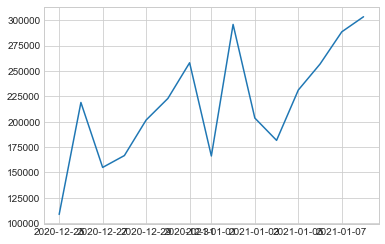

In [139]:
US_data = new_df[new_df["location"] == "United States"]
christmas_day = US_data[US_data["holiday"] == "Christmas Day"]
christmas_day
for row in christmas_day.iterrows():
    period = US_data[US_data["date"].between(row[1]["date"], row[1]["date"] + timedelta(days=14))]
    plt.plot(period["date"], period["new_cases"])

In [ ]:
US_data = new_df[new_df["location"] == "United States"]
US_holidays_data = US_data[US_data["location"] == "United States"]
christmas_day
for row in christmas_day.iterrows():
    period = US_data[US_data["date"].between(row[1]["date"], row[1]["date"] + timedelta(days=14))]
    plt.plot(period["date"], period["new_cases"])

In [82]:
holidayDf = new_df[~new_df["holiday"].isnull()]

In [83]:
holidayDf[["holiday", "pct_change"]]

,holiday,pct_change
5,Summer Day,20.000000
13,Nowruz,15.384615
18,Catholic Easter,125.000000
19,Catholic Easter,163.636364
53,"Orthodox Easter, May Day",-11.111111
...,...,...
45529,Labor Day,38.785672
45564,Columbus Day,59.922841
45594,Veterans Day,16.004629
45609,Thanksgiving,89.343335


In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

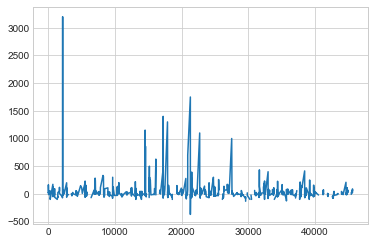

In [86]:
plt.plot(holidayDf["pct_change"])

In [99]:
holidayDf["pct_change"].replace([np.inf], 0)
largest = holidayDf.nlargest(10, "pct_change")
largest


,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,country,code,country_official_name,lower_window,upper_window,prior_scale,source,7_days_later,7_days_later_cases,pct_change
6290,23144,BDI,Africa,Burundi,2020-08-15,412.0,0.0,1.000,1.0,0.0,...,Burundi,BI,Republic of Burundi,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-08-22,3.0,inf
6357,23211,BDI,Africa,Burundi,2020-10-21,550.0,0.0,3.000,1.0,0.0,...,Burundi,BI,Republic of Burundi,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-10-28,1.0,inf
6369,23223,BDI,Africa,Burundi,2020-11-02,589.0,0.0,4.571,1.0,0.0,...,Burundi,BI,Republic of Burundi,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-11-09,2.0,inf
9700,33456,HRV,Europe,Croatia,2020-06-11,2249.0,0.0,0.286,106.0,0.0,...,Croatia,HR,Republic of Croatia,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-06-18,11.0,inf
16567,55174,GRC,Europe,Greece,2020-04-20,2245.0,0.0,14.286,116.0,0.0,...,Greece,GR,Hellenic Republic,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-04-27,17.0,inf
16616,55223,GRC,Europe,Greece,2020-06-08,3049.0,0.0,18.714,182.0,0.0,...,Greece,GR,Hellenic Republic,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-06-15,13.0,inf
17384,61719,HND,North America,Honduras,2020-09-15,68620.0,0.0,486.000,2087.0,0.0,...,Honduras,HN,Republic of Honduras,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-09-22,231.0,inf
18633,63688,ISL,Europe,Iceland,2020-05-31,1806.0,0.0,0.286,10.0,0.0,...,Iceland,IS,Republic of Iceland,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-06-07,1.0,inf
18650,63705,ISL,Europe,Iceland,2020-06-17,1812.0,0.0,0.714,10.0,0.0,...,Iceland,IS,Republic of Iceland,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-06-24,2.0,inf
18847,63902,ISL,Europe,Iceland,2020-12-31,5754.0,0.0,10.143,29.0,0.0,...,Iceland,IS,Republic of Iceland,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2021-01-07,13.0,inf


In [98]:
type(holidayDf["pct_change"][6290])

numpy.float64

In [100]:
x = holidayDf[~holidayDf.isin([np.inf, -np.inf]).any(1)]

In [103]:
xr

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,country,code,country_official_name,lower_window,upper_window,prior_scale,source,7_days_later,7_days_later_cases,pct_change
2158,9020,AUT,Europe,Austria,2020-06-01,16733.0,2.0,27.714,668.0,0.0,...,Austria,AT,Republic of Austria,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-06-08,66.0,3200.000000
21305,69099,ISR,Asia,Israel,2020-03-09,60.0,4.0,6.857,NaN,NaN,...,Israel,IL,State of Israel,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-03-16,74.0,1750.000000
17228,61563,HND,North America,Honduras,2020-04-12,393.0,1.0,17.857,25.0,1.0,...,Honduras,HN,Republic of Honduras,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-04-19,15.0,1400.000000
17876,62929,HUN,Europe,Hungary,2020-03-15,32.0,2.0,3.571,1.0,1.0,...,Hungary,HU,Hungary,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-03-22,28.0,1300.000000
14521,49785,FRA,Europe,France,2020-05-21,183317.0,267.0,394.429,28218.0,82.0,...,France,FR,French Republic,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-05-28,3342.0,1151.685393
22704,71168,JPN,Asia,Japan,2020-02-11,27.0,1.0,0.714,NaN,NaN,...,Japan,JP,Japan,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-02-18,12.0,1100.000000
27503,91451,MDA,Europe,Moldova,2020-03-08,1.0,1.0,NaN,NaN,NaN,...,Moldova,MD,Republic of Moldova,-3.0,3.0,10.0,https://en.wikipedia.org/wiki/Public_holidays_...,2020-03-15,11.0,1000.000000
14575,49839,FRA,Europe,France,2020-07-14,211802.0,62.0,533.143,30037.0,2.0,...,France,FR,French Republic,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2020-07-21,595.0,859.677419
20911,68044,IRL,Europe,Ireland,2020-12-28,86894.0,765.0,946.714,2205.0,1.0,...,Ireland,IE,Ireland,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2021-01-04,6110.0,698.692810
16133,53395,DEU,Europe,Germany,2020-12-25,1632736.0,2140.0,20842.429,29580.0,250.0,...,Germany,DE,Federal Republic of Germany,-3.0,3.0,10.0,https://github.com/dr-prodigy/python-holidays,2021-01-01,15575.0,627.803738
